# PIAIC Deep Learning Assignment

H M Sarmad Khan
PIAIC_AI_101225

# Assignment: 
Compresive Strength Concrete Problem

**Abstract:**

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.

**WORKFLOW :** 

Load Data

Check Missing Values ( If Exist ; Fill each record with mean of its feature )

Standardized the Input Variables. Hint: Centeralized the data Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

Train the Model with Epochs (100) and validate it

If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

Evaluation Step

Prediction

In [ ]:
#upload the dataset

In [1]:
#import all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers

In [2]:
#to upload the Datset File that we use in training
from google.colab import files
upload=files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete (1).csv


In [3]:
df=pd.read_csv('/content/compresive_strength_concrete.csv')#reading the file 
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df['Age (day)']=df.select_dtypes('int64').astype('float64')#converting age column to float64

In [6]:
test_val=(30/100)*len(df)#get the value that r 30% of Dataset
train_val=(50/100)*len(df)#get the value that r 50% of Dataset
val_val=(20/100)*len(df)#get the value that r 20% of Dataset

test_data=df.loc[len(df)-test_val: ,:'Age (day)']#separating the test data from dataset, pick the data from last of dataset
test_labels=df.loc[len(df)-test_val: ,'Concrete compressive strength(MPa, megapascals) ']#separating the test labels from dataset

remaining_data=df.loc[:len(df)-test_val,:'Age (day)']#to store the remaing datset for further processing
remaining_labels=df.loc[:len(df)-test_val,'Concrete compressive strength(MPa, megapascals) ']

In [7]:
mean=df.mean(axis=0)
std=df.std(axis=0)

remaining_data-=mean
remaining_data/=std

test_data-=mean
test_data/=std

In [8]:
train_data = remaining_data.loc[ :test_val]
train_labels = remaining_labels.loc[ :test_val]

val_data=remaining_data.loc[test_val:]
val_labels=remaining_labels.loc[test_val:]

In [9]:
model=models.Sequential()
model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
model.add(layers.Dense(36,activation='relu'))
model.add(layers.Dense(1))


model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


model.fit(train_data,train_labels,epochs=150,batch_size=100,validation_data=(val_data,val_labels))


Epoch 1/150
4/4 [==============================] - 3s 170ms/step - loss: 2109.8686 - mae: 42.2642 - val_loss: 1356.5934 - val_mae: 32.8854
Epoch 2/150
4/4 [==============================] - 0s 16ms/step - loss: 2009.9702 - mae: 41.2343 - val_loss: 1336.1583 - val_mae: 32.5806
Epoch 3/150
4/4 [==============================] - 0s 16ms/step - loss: 2016.5909 - mae: 41.3236 - val_loss: 1315.5648 - val_mae: 32.2715
Epoch 4/150
4/4 [==============================] - 0s 17ms/step - loss: 2005.1787 - mae: 41.0667 - val_loss: 1297.6787 - val_mae: 31.9997
Epoch 5/150
4/4 [==============================] - 0s 21ms/step - loss: 1930.6287 - mae: 40.2849 - val_loss: 1278.5962 - val_mae: 31.7150
Epoch 6/150
4/4 [==============================] - 0s 16ms/step - loss: 1941.4856 - mae: 40.4060 - val_loss: 1258.9408 - val_mae: 31.4111
Epoch 7/150
4/4 [==============================] - 0s 16ms/step - loss: 1858.1860 - mae: 39.4856 - val_loss: 1238.3407 - val_mae: 31.0959
Epoch 8/150
4/4 [================

In [10]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
  model.add(layers.Dense(36,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [11]:
k = 4
num_val_samples = len(remaining_data) // k
num_epochs = 80
all_mae_histories = []
for i in range(k):
 print('processing fold #', i)

 # Prepare the validation data: data from partition # k
 val_data = remaining_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = remaining_labels[i * num_val_samples: (i + 1) * num_val_samples]


 # Prepare the training data: data from all other partitions
 partial_train_data = np.concatenate([remaining_data[:i * num_val_samples],remaining_data[(i + 1) * num_val_samples:]],axis=0)
 partial_train_targets = np.concatenate([remaining_labels[:i * num_val_samples],remaining_labels[(i + 1) * num_val_samples:]],axis=0)
 # Build the Keras model (already compiled)


 model = build_model()
 # Train the model (in silent mode, verbose=0)
 history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=5)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/80
109/109 [==============================] - 1s 5ms/step - loss: 1178.5262 - mae: 30.3779 - val_loss: 2017.3936 - val_mae: 41.8494
Epoch 2/80
109/109 [==============================] - 0s 4ms/step - loss: 701.1290 - mae: 21.9183 - val_loss: 1062.3975 - val_mae: 27.9414
Epoch 3/80
109/109 [==============================] - 0s 4ms/step - loss: 310.4242 - mae: 13.6829 - val_loss: 603.5052 - val_mae: 19.5753
Epoch 4/80
109/109 [==============================] - 0s 4ms/step - loss: 210.0589 - mae: 11.4949 - val_loss: 447.8260 - val_mae: 16.4104
Epoch 5/80
109/109 [==============================] - 0s 4ms/step - loss: 163.9597 - mae: 10.1133 - val_loss: 416.8099 - val_mae: 16.1101
Epoch 6/80
109/109 [==============================] - 0s 4ms/step - loss: 148.5146 - mae: 9.7851 - val_loss: 441.6183 - val_mae: 16.6498
Epoch 7/80
109/109 [==============================] - 0s 3ms/step - loss: 150.2552 - mae: 9.6229 - val_loss: 468.3213 - val_mae: 17.0671
Epoch 8/80
10

In [12]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

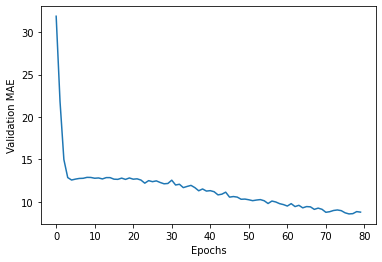

In [13]:
plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [14]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 128.3641 - mae: 8.9406


In [15]:
test_mae_score

8.940631866455078